In [1]:
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import matplotlib


In [2]:
SMALL_SIZE = 24
MEDIUM_SIZE = 28

# plt.rcParams['text.usetex'] = True

plt.rc('font', size=MEDIUM_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=15)  # legend fontsize

In [3]:
for domain in ['intervals', 'zonos', 'precise']:
    print(f'{domain} runtimes:')

    l3 = torch.load(f'results/time_{domain}_3layer.pth')
    l4 = torch.load(f'results/time_{domain}_4layer.pth')
    l5 = torch.load(f'results/time_{domain}_5layer.pth')
    lbig = torch.load(f'results/time_{domain}_big.pth')
    print(f'3layer: {sum(l3) / len(l3)}s')
    print(f'4layer: {sum(l4) / len(l4)}s')
    print(f'5layer: {sum(l5) / len(l5)}s')
    print(f'big: {sum(lbig) / len(lbig)}s')
    print()


intervals runtimes:
3layer: 0.003375142568373122s
4layer: 0.003826008581439965s
5layer: 0.004691280928556809s
big: 0.05416417874128092s

zonos runtimes:
3layer: 0.002103607229189947s
4layer: 0.003524429542594589s
5layer: 0.005330774147761986s
big: 0.3610913585774833s

precise runtimes:
3layer: 0.06364393429132179s
4layer: 0.09685908066167029s
5layer: 0.13492934258945755s
big: 1.4874507459463784s


3-layer network zono/interval Lipschitz constant difference: 21946.28789865411
3-layer network precise zono/zono Lipschitz constant difference: 4481.510472854055

4-layer network zono/interval Lipschitz constant difference: 343233.6765581253
4-layer network precise zono/zono Lipschitz constant difference: 46311.18890220979

5-layer network zono/interval Lipschitz constant difference: 3837042.2688641716
5-layer network precise zono/zono Lipschitz constant difference: 373321.4839144953

big network zono/interval Lipschitz constant difference: 14083321.524706215
big network precise zono/zono Lipschitz constant difference: 2005236.4355395355


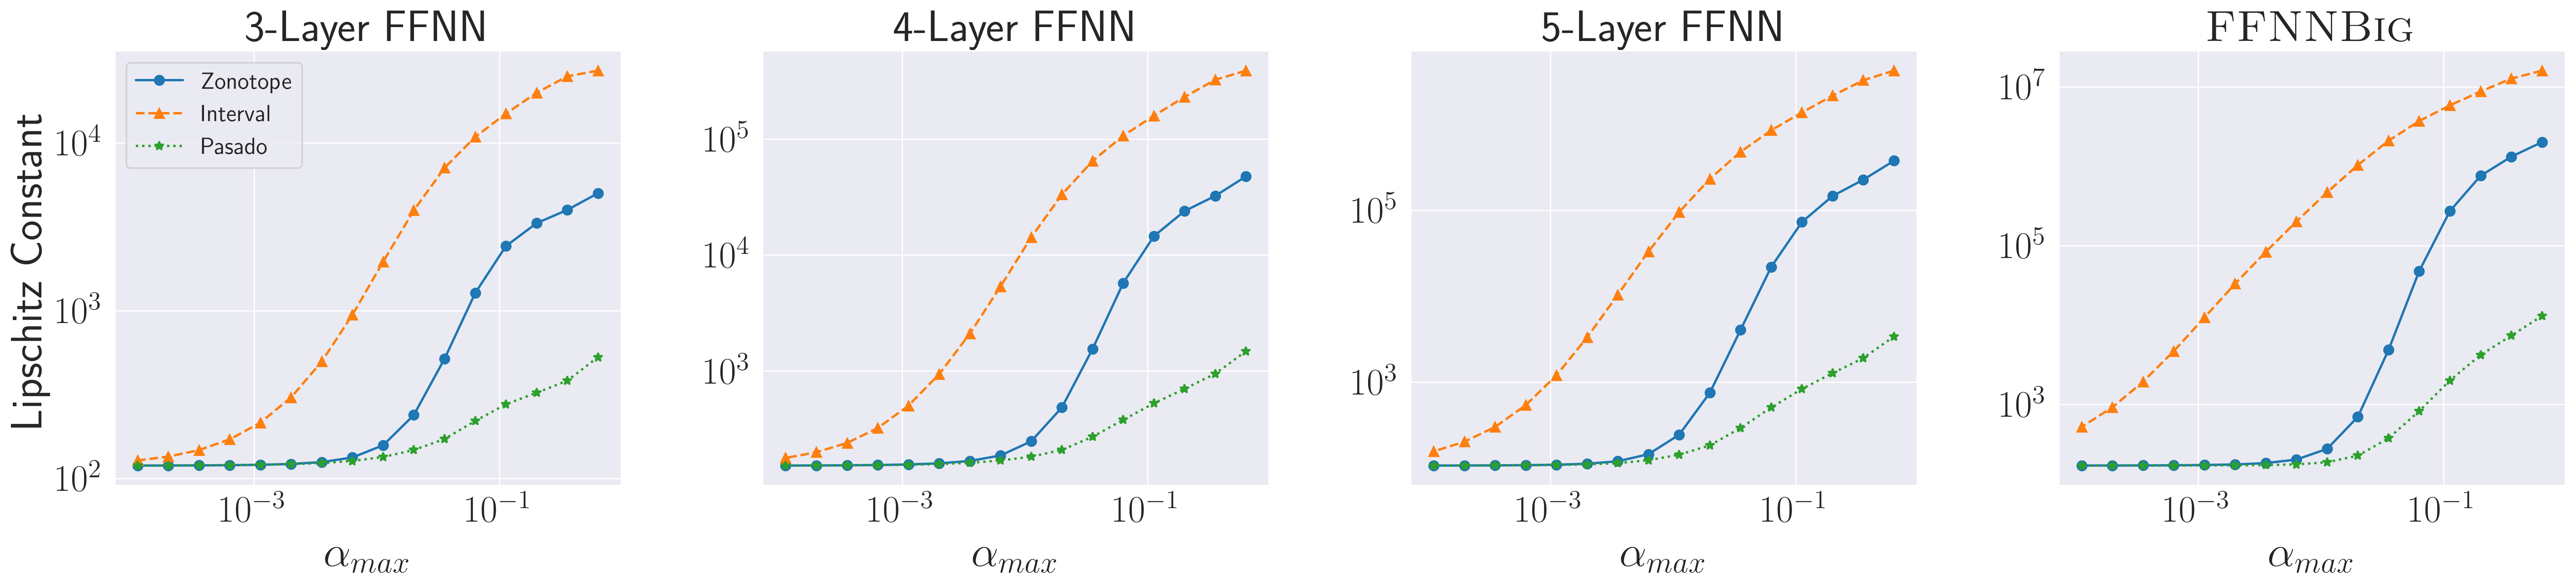

In [4]:

import numpy as np

sns.set_style('darkgrid')

epsilons = [10 ** (-k / 4) * 2 for k in range(2, 18)]

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(28, 5), dpi=300)
plt.subplots_adjust(wspace=0.28)

for i, layers in enumerate([3, 4, 5]):
    lc_zonos = torch.load(f'./results/lc_zonos_{layers}layer.pth')
    lc_intervals = torch.load(f'./results/lc_intervals_{layers}layer.pth')
    lc_precise = torch.load(f'./results/lc_precise_{layers}layer.pth')

    print(f'{layers}-layer network zono/interval Lipschitz constant difference:', max(lc_intervals) - max(lc_zonos))
    print(f'{layers}-layer network precise zono/zono Lipschitz constant difference:', max(lc_zonos) - max(lc_precise))
    print()

    axs[i].plot(epsilons, lc_zonos, marker='o', label='Zonotope')
    axs[i].plot(epsilons, lc_intervals, linestyle='--', marker='^', label='Interval')
    axs[i].plot(epsilons, lc_precise, linestyle=':', marker='*', label='Pasado')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].set_xlabel(r'$\alpha_{max}$')
    axs[i].set_title(f'{layers}-Layer FFNN')

    if i == 0:
        axs[i].legend()
        axs[i].set_ylabel('Lipschitz Constant')

layers = 'big'

lc_zonos = torch.load(f'./results/lc_zonos_{layers}.pth')
lc_intervals = torch.load(f'./results/lc_intervals_{layers}.pth')
lc_precise = torch.load(f'./results/lc_precise_{layers}.pth')

print('big network zono/interval Lipschitz constant difference:', max(lc_intervals) - max(lc_zonos))
print('big network precise zono/zono Lipschitz constant difference:', max(lc_zonos) - max(lc_precise))
print()

axs[3].plot(epsilons, lc_zonos, marker='o', label='Zonotope')
axs[3].plot(epsilons, lc_intervals, linestyle='--', marker='^', label='Interval')
axs[3].plot(epsilons, lc_precise, linestyle=':', marker='*', label='Pasado')
axs[3].set_xscale('log')
axs[3].set_yscale('log')
axs[3].set_xlabel(r'$\alpha_{max}$')
axs[3].set_title(r'\textsc{FFNNBig}')

plt.show()
# plt.savefig('lipschitz-constant.jpg', bbox_inches='tight')


3-layer network pasado/zono relative precision improvement: 10.418655269398155

4-layer network pasado/zono relative precision improvement: 34.23618775793357

5-layer network pasado/zono relative precision improvement: 118.75660456822406

big network zono/interval Lipschitz constant difference: 14083321.524706215
big network precise zono/zono Lipschitz constant difference: 2005236.4355395355
big network precise zono/zono relative precision improvement: 181.7895656808078


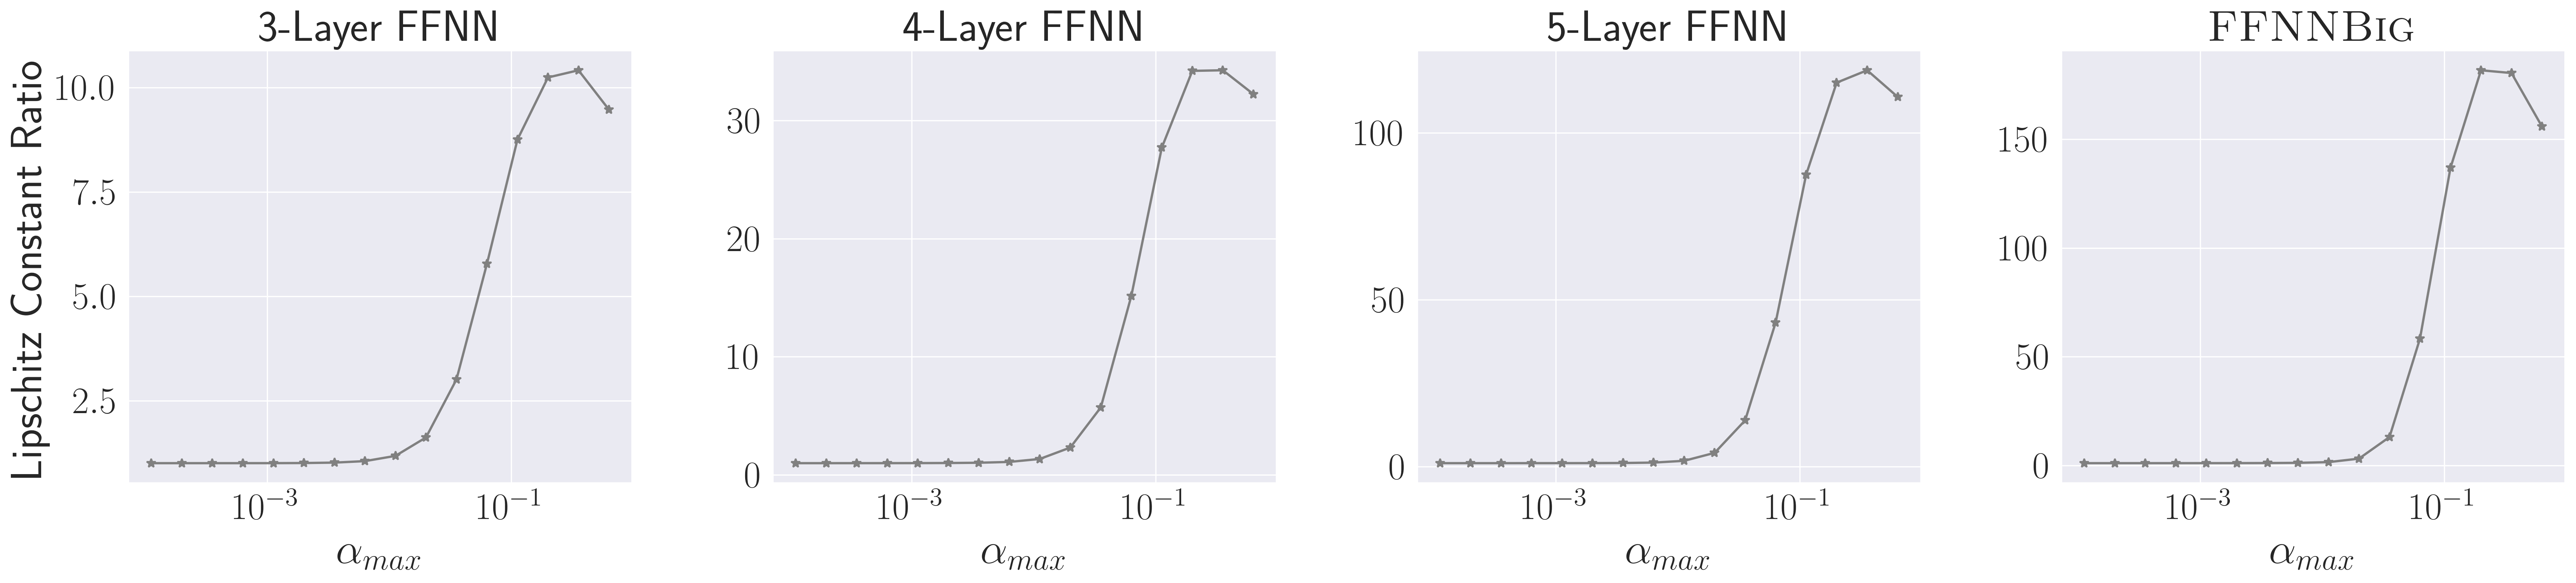

In [5]:

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(28, 5), dpi=300)
plt.subplots_adjust(wspace=0.28)

for i, layers in enumerate([3, 4, 5]):
    lc_zonos = torch.load(f'./results/lc_zonos_{layers}layer.pth')
    lc_precise = torch.load(f'./results/lc_precise_{layers}layer.pth')

    prec = np.array(lc_zonos) / np.array(lc_precise)
    print(f'{layers}-layer network pasado/zono relative precision improvement:', max(prec))
    print()

    axs[i].plot(epsilons, prec, marker='*', color='gray')
    axs[i].set_xscale('log')
    axs[i].set_xlabel(r'$\alpha_{max}$')
    axs[i].set_title(f'{layers}-Layer FFNN')

    if i == 0:
        axs[i].set_ylabel('Lipschitz Constant Ratio')

layers = 'big'

lc_zonos = torch.load(f'./results/lc_zonos_{layers}.pth')
lc_precise = torch.load(f'./results/lc_precise_{layers}.pth')

prec = np.array(lc_zonos) / np.array(lc_precise)
print('big network zono/interval Lipschitz constant difference:', max(lc_intervals) - max(lc_zonos))
print('big network precise zono/zono Lipschitz constant difference:', max(lc_zonos) - max(lc_precise))
print(f'big network precise zono/zono relative precision improvement:', max(prec))
print()

axs[3].plot(epsilons, prec, marker='*', color='gray')
axs[3].set_xscale('log')
axs[3].set_xlabel(r'$\alpha_{max}$')
axs[3].set_title(r'\textsc{FFNNBig}')

plt.show()
# plt.savefig('lipschitz-precision.jpg', bbox_inches='tight')
